In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import SGDRegressor as sgd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor ,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [2]:
from joblib import cpu_count

n_jobs = cpu_count()

print(n_jobs)

16


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [9]:
print(y)

      Rings
0        15
1         7
2         9
3        10
4         7
...     ...
4172     11
4173     10
4174      9
4175     10
4176     12

[4177 rows x 1 columns]


In [10]:
print(X)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550 

In [4]:
X = pd.DataFrame(X)
Y = np.array(y)
feat = X.columns[:-1]

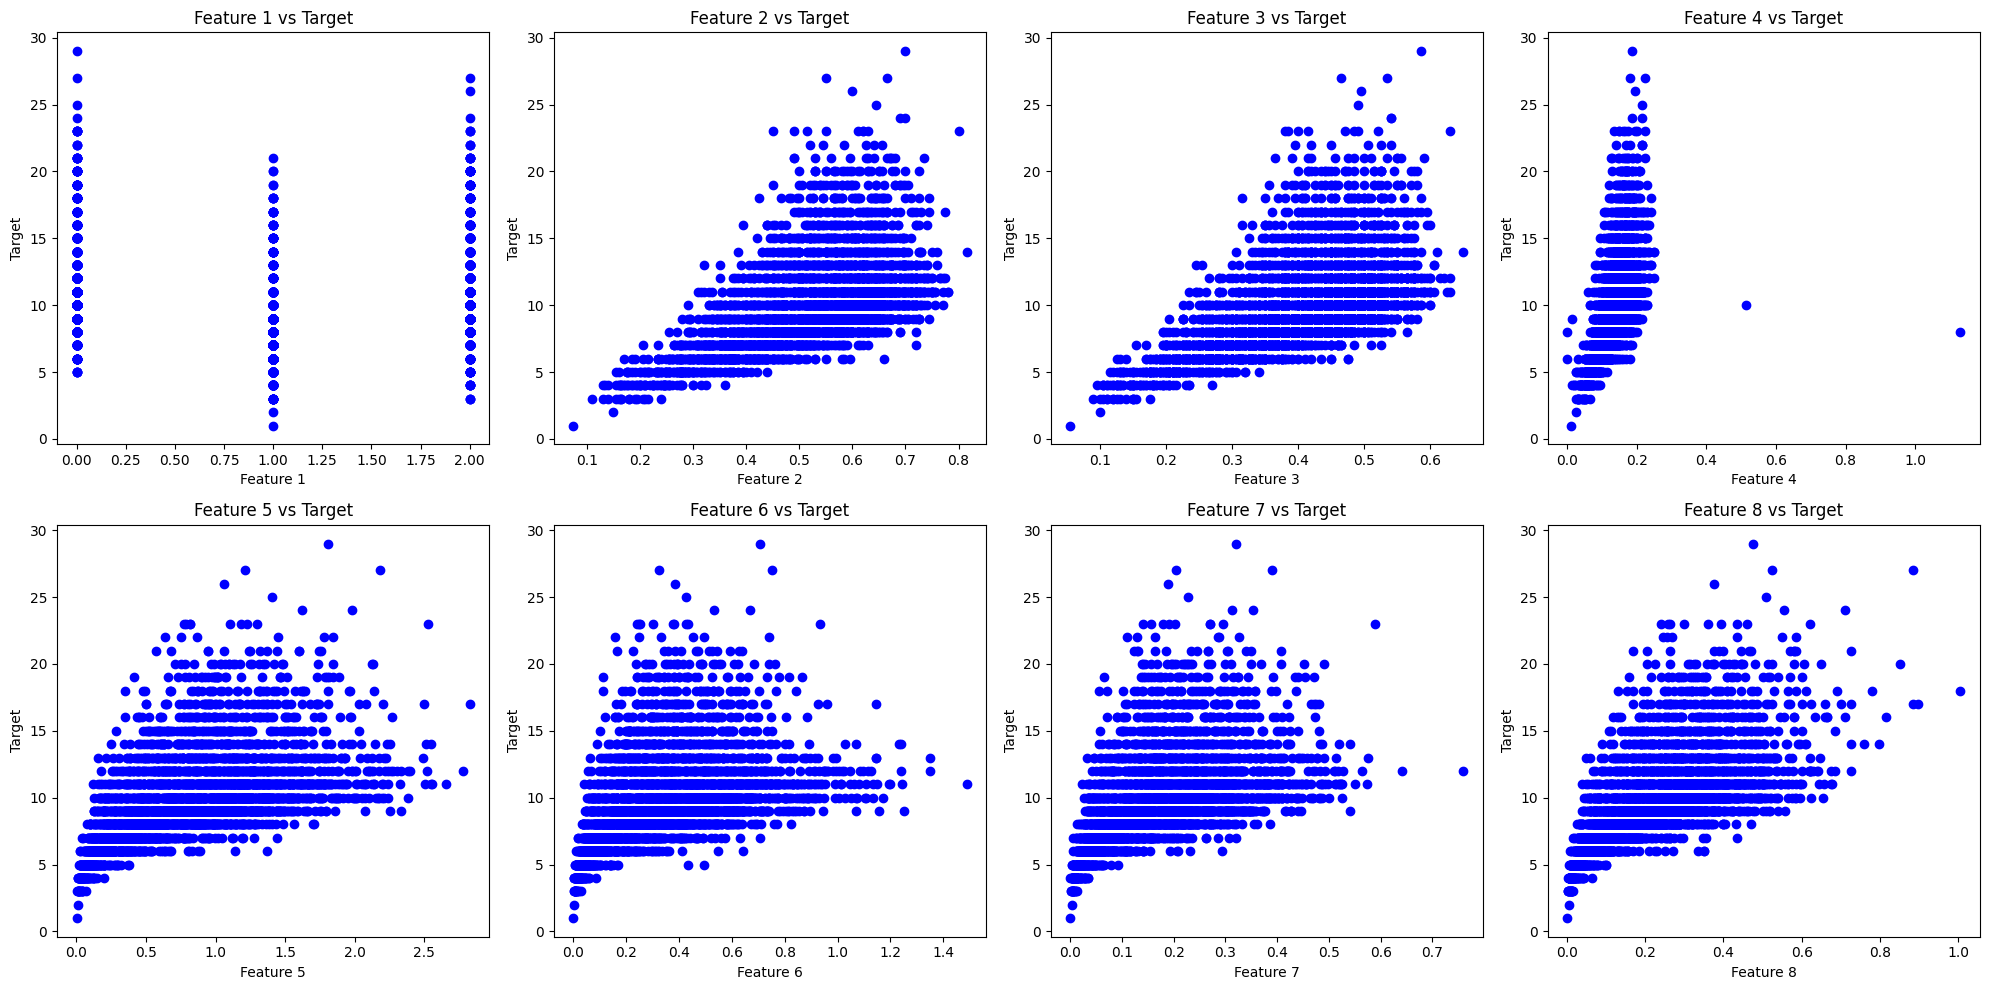

<Figure size 640x480 with 0 Axes>

In [5]:
le = LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])


ig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axs = axs.ravel()  # Flatten the 2D array of axes
for i in range(8):
    axs[i].scatter(X.iloc[:, i], Y, color='blue')
    axs[i].set_title(f'Feature {i+1} vs Target')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Target')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [6]:
Y = Y.flatten()

y = pd.Series(Y)

# Calculate correlation coefficients
correlations = X.corrwith(pd.Series(y, name='Target'))

# Display the correlation coefficients
print(correlations)


Sex              -0.034627
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole_weight      0.540390
Shucked_weight    0.420884
Viscera_weight    0.503819
Shell_weight      0.627574
dtype: float64


We will first split , remove outliers and then standardize and then normalize

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out,df_out.index

X_train,t1 = remove_outliers(X_train)
X_test,t2 = remove_outliers(X_test)

y_train = y_train[t1]
y_test = y_test[t2]



In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_standardized)
X_test  = scaler.transform(X_test_standardized)

Linear Regression Model

In [31]:
model1 = linear_model.LinearRegression()
reg = model1.fit(X_train,y_train)

y_pred = reg.predict(X_test)


print(metrics.mean_squared_error(y_test,y_pred))

4.7579765165552095


SGD Regressor

In [36]:


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardize features
scaler = StandardScaler()

# Define the model
model2 = linear_model.SGDRegressor(max_iter=1000)

# Create a pipeline
pipeline = make_pipeline(scaler, model2)

# Define the parameter grid
param_grid = {
    'sgdregressor__loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'sgdregressor__penalty': ['l2', 'l1', 'elasticnet',None],
    'sgdregressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'sgdregressor__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'sgdregressor__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# Perform GridSearchCV for selecting parameters
m2_search_param = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=16)

# Fit the model
reg2 = m2_search_param.fit(X_train, y_train)

# Print the best parameters
print(reg2.best_params_)

# Predict and calculate MSE
y_pred2 = reg2.predict(X_test) 
print(metrics.mean_squared_error(y_test, y_pred2))

{'sgdregressor__alpha': 1.0, 'sgdregressor__epsilon': 0.1, 'sgdregressor__l1_ratio': 0.4, 'sgdregressor__loss': 'squared_error', 'sgdregressor__penalty': None}
4.810725703554004


MLP Regressor

In [37]:
model3 = MLPRegressor(max_iter=1000)  
param_grid2 = {
    'hidden_layer_sizes': [(100,), (200,), (100, 100), (200, 200)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive']
}

# Print the best parameters
# Use GridSearchCV to get reg3
reg3 = GridSearchCV(model3, param_grid=param_grid2, cv=5, scoring='neg_mean_squared_error', n_jobs=16)
reg3.fit(X_train, y_train)  


print(reg3.best_params_)  # Access the best_params_ attribute

y_pred3 = reg3.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred3))


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
4.385469735124744


Gradient Boost Regressor

In [40]:
# Define the model
model_gb = GradientBoostingRegressor()

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [300,500,600,800,1000],
    'learning_rate': [0.01,0.03,0.05,0.07,0.095,0.1 ],
    'max_depth': [4, 5 ,8],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

# Grid search
reg_gb = GridSearchCV(model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=16)
reg_gb.fit(X_train, y_train)

# Print the best parameters
print(reg_gb.best_params_)

# Predict and evaluate
y_pred_gb = reg_gb.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred_gb))



{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 600}
4.7514735606207035


ADABOOST REGRESSOR

In [41]:
# Define the model
model_ab = AdaBoostRegressor()

# Define the parameter grid
param_grid_ab = {
    'n_estimators': [100, 200,400,600],
    'learning_rate': [0.01, 0.03,0.08,0.06,0.1,0.3,0.5],
    'loss' : ['linear', 'square', 'exponential'],
}

# Grid search
reg_ab = GridSearchCV(model_ab, param_grid=param_grid_ab, cv=5, scoring='neg_mean_squared_error', n_jobs=16)
reg_ab.fit(X_train, y_train)

# Print the best parameters
print(reg_ab.best_params_)

# Predict and evaluate
y_pred_ab = reg_ab.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred_ab))

{'learning_rate': 0.03, 'loss': 'exponential', 'n_estimators': 100}
5.64333108734749


RandomForest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the model
model_rf = RandomForestRegressor()

# Define the corrected parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],  # Add None as a valid option
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
reg_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=16)
reg_rf.fit(X_train, y_train)

# Print the best parameters
print(reg_rf.best_params_)

# Predict and evaluate
y_pred_rf = reg_rf.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred_rf))


{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
4.692778016522817


XGBoost Regressor

In [46]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model_xgb = XGBRegressor(n_jobs=16)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 300, 500, 600],
    'learning_rate': [0.01, 0.04, 0.07, 0.1, 0.2 , 0.5],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.5, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

# Grid search
reg_xgb = GridSearchCV(model_xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=16)
reg_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

# Print the best parameters
print(reg_xgb.best_params_)

# Predict and evaluate
y_pred_xgb = reg_xgb.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred_xgb))

[0]	validation_0-rmse:3.06905
[1]	validation_0-rmse:3.01747
[2]	validation_0-rmse:2.96827
[3]	validation_0-rmse:2.91631
[4]	validation_0-rmse:2.86837
[5]	validation_0-rmse:2.82577
[6]	validation_0-rmse:2.78411
[7]	validation_0-rmse:2.74054
[8]	validation_0-rmse:2.70625
[9]	validation_0-rmse:2.67798
[10]	validation_0-rmse:2.64581
[11]	validation_0-rmse:2.61687
[12]	validation_0-rmse:2.58449
[13]	validation_0-rmse:2.55627
[14]	validation_0-rmse:2.52965
[15]	validation_0-rmse:2.50223
[16]	validation_0-rmse:2.47831
[17]	validation_0-rmse:2.45681
[18]	validation_0-rmse:2.43933
[19]	validation_0-rmse:2.42116
[20]	validation_0-rmse:2.40561
[21]	validation_0-rmse:2.38720
[22]	validation_0-rmse:2.37099
[23]	validation_0-rmse:2.35311
[24]	validation_0-rmse:2.34126
[25]	validation_0-rmse:2.32603
[26]	validation_0-rmse:2.31278
[27]	validation_0-rmse:2.29926
[28]	validation_0-rmse:2.29169
[29]	validation_0-rmse:2.27880
[30]	validation_0-rmse:2.27146
[31]	validation_0-rmse:2.26175
[32]	validation_0-

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-rmse:2.19222
[43]	validation_0-rmse:2.18746
[44]	validation_0-rmse:2.18381
[45]	validation_0-rmse:2.18129
[46]	validation_0-rmse:2.17897
[47]	validation_0-rmse:2.17646
[48]	validation_0-rmse:2.17176
[49]	validation_0-rmse:2.16835
[50]	validation_0-rmse:2.16597
[51]	validation_0-rmse:2.16422
[52]	validation_0-rmse:2.16222
[53]	validation_0-rmse:2.15871
[54]	validation_0-rmse:2.15911
[55]	validation_0-rmse:2.15783
[56]	validation_0-rmse:2.15379
[57]	validation_0-rmse:2.15259
[58]	validation_0-rmse:2.15120
[59]	validation_0-rmse:2.14886
[60]	validation_0-rmse:2.14811
[61]	validation_0-rmse:2.14777
[62]	validation_0-rmse:2.14442
[63]	validation_0-rmse:2.14284
[64]	validation_0-rmse:2.14422
[65]	validation_0-rmse:2.14361
[66]	validation_0-rmse:2.14358
[67]	validation_0-rmse:2.14182
[68]	validation_0-rmse:2.14331
[69]	validation_0-rmse:2.14214
[70]	validation_0-rmse:2.14103
[71]	validation_0-rmse:2.14238
[72]	validation_0-rmse:2.14329
[73]	validation_0-rmse:2.14266
[74]	val

Thus after runnning all models , MLP Regressor is the winnner . 